# Event Based Trading Strategy using Earnings Call Sentiment

In [97]:
#downloading packages
import pandas as pd
import numpy as np
import os
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

In [98]:
#setting directory and downloading all classified calls.
os.chdir("C:/Users/xeb15154\OneDrive - University of Strathclyde/PhD/Excel Files (Data)/EPC2/EPC2 Variable Calculations")
df = pd.read_csv('SP100_sentiment_variables_multimodal.csv')
df.head()

,Unnamed: 0,id,basic_call_sentiment,AF_sentiment_1,AF_sentiment_2,AF_sentiment_3,time
0,0,AAPL_10209,0.161290,0.303030,0.606136,20.0,22/07/2008 00:27
1,124,AAPL_103533,0.020619,0.047619,0.090972,2.0,27/07/2016 01:02
2,221,AAPL_107733,0.136752,0.333333,0.663294,16.0,26/10/2016 01:36
3,338,AAPL_111982,0.198473,0.361111,0.733969,26.0,01/02/2017 01:28
4,469,AAPL_116922,0.145161,0.310345,0.619039,18.0,03/05/2017 00:14


In [99]:
#Creating a ticker column that will allow me to get a list of all tickers and their associated prices
df['ticker'] = df['id'].str.split('_').str[0]
df.head()

,Unnamed: 0,id,basic_call_sentiment,AF_sentiment_1,AF_sentiment_2,AF_sentiment_3,time,ticker
0,0,AAPL_10209,0.161290,0.303030,0.606136,20.0,22/07/2008 00:27,AAPL
1,124,AAPL_103533,0.020619,0.047619,0.090972,2.0,27/07/2016 01:02,AAPL
2,221,AAPL_107733,0.136752,0.333333,0.663294,16.0,26/10/2016 01:36,AAPL
3,338,AAPL_111982,0.198473,0.361111,0.733969,26.0,01/02/2017 01:28,AAPL
4,469,AAPL_116922,0.145161,0.310345,0.619039,18.0,03/05/2017 00:14,AAPL


In [100]:
#getting a list of the tickers
df['ticker'].value_counts()

ticker
GILD    66
GOOG    64
EL      63
AAPL    62
AMD     62
        ..
PYPL    21
NEE     15
TXN      8
LIN      7
RTX      4
Name: count, Length: 97, dtype: int64

In [101]:
ticker_list = df['ticker'].unique()
ticker_list

array(['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'ADP', 'AMAT', 'AMD', 'AMGN',
       'AMT', 'AMZN', 'ANTM', 'AVGO', 'AXP', 'BAC', 'BA', 'BKNG', 'BLK',
       'BMY', 'CAT', 'CHTR', 'CI', 'CMCSA', 'COST', 'CRM', 'CSCO', 'CVS',
       'CVX', 'C', 'DE', 'DHR', 'DIS', 'EL', 'FB', 'FIS', 'GE', 'GILD',
       'GOOG', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'INTU', 'ISRG', 'JNJ',
       'JPM', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'LRCX', 'MA', 'MCD',
       'MDLZ', 'MDT', 'MMM', 'MO', 'MRK', 'MSFT', 'MS', 'MU', 'NEE',
       'NFLX', 'NKE', 'NOW', 'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PLD',
       'PM', 'PNC', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SPGI', 'SYK', 'TGT',
       'TJX', 'TMO', 'TMUS', 'TSLA', 'TXN', 'T', 'UNH', 'UNP', 'UPS',
       'USB', 'VZ', 'V', 'WFC', 'XOM', 'ZTS'], dtype=object)

In [102]:
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'], format='%d/%m/%Y %H:%M', errors='coerce')

#Creating a date column that changes the time format
df['date'] = df['time'].dt.date
df.head()

,Unnamed: 0,id,basic_call_sentiment,AF_sentiment_1,AF_sentiment_2,AF_sentiment_3,time,ticker,date
0,0,AAPL_10209,0.161290,0.303030,0.606136,20.0,2008-07-22 00:27:00,AAPL,2008-07-22
1,124,AAPL_103533,0.020619,0.047619,0.090972,2.0,2016-07-27 01:02:00,AAPL,2016-07-27
2,221,AAPL_107733,0.136752,0.333333,0.663294,16.0,2016-10-26 01:36:00,AAPL,2016-10-26
3,338,AAPL_111982,0.198473,0.361111,0.733969,26.0,2017-02-01 01:28:00,AAPL,2017-02-01
4,469,AAPL_116922,0.145161,0.310345,0.619039,18.0,2017-05-03 00:14:00,AAPL,2017-05-03


In [103]:
#Cleaning up the df_goog dataset to only contain relevant data for the analysis. Call this new dataset earnings
earnings = df[['id', 'AF_sentiment_1', 'date','ticker']]
earnings = earnings.rename(columns={"AF_sentiment_1": "sentiment"})
earnings.head()

,id,sentiment,date,ticker
0,AAPL_10209,0.303030,2008-07-22,AAPL
1,AAPL_103533,0.047619,2016-07-27,AAPL
2,AAPL_107733,0.333333,2016-10-26,AAPL
3,AAPL_111982,0.361111,2017-02-01,AAPL
4,AAPL_116922,0.310345,2017-05-03,AAPL


In [104]:
#setting date as a datetime variable
earnings['date'] = pd.to_datetime(earnings['date'])

In [105]:
#I can only get google data from 2014-2020 therefore reducing the earnings dataset to only contain calls in this period
# Filter rows where Year is between 2014 and 2020 (inclusive)
earnings = earnings[(earnings['date'].dt.year >= 2014) & (earnings['date'].dt.year <= 2020)]
earnings

,id,sentiment,date,ticker
1,AAPL_103533,0.047619,2016-07-27,AAPL
2,AAPL_107733,0.333333,2016-10-26,AAPL
3,AAPL_111982,0.361111,2017-02-01,AAPL
4,AAPL_116922,0.310345,2017-05-03,AAPL
6,AAPL_121172,0.818182,2017-08-02,AAPL
...,...,...,...,...
5117,ZTS_80988,0.508197,2015-02-11,ZTS
5118,ZTS_83687,0.296296,2015-05-05,ZTS
5119,ZTS_87917,0.507246,2015-08-04,ZTS
5120,ZTS_92119,0.345455,2015-11-03,ZTS


In [106]:
#viewing the cleaned earnings dataset
print(earnings.dtypes)
print(earnings.head())

id                   object
sentiment           float64
date         datetime64[ns]
ticker               object
dtype: object
            id  sentiment       date ticker
1  AAPL_103533   0.047619 2016-07-27   AAPL
2  AAPL_107733   0.333333 2016-10-26   AAPL
3  AAPL_111982   0.361111 2017-02-01   AAPL
4  AAPL_116922   0.310345 2017-05-03   AAPL
6  AAPL_121172   0.818182 2017-08-02   AAPL


In [107]:
#identifying the span of earnings calls
print('earliest call date',earnings['date'].min())
print('latest call date',earnings['date'].max())

earliest call date 2014-01-08 00:00:00
latest call date 2020-12-19 00:00:00


In [108]:
#Downloading google price data
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2020, 12, 31)

price = web.DataReader(ticker_list, "stooq", start, end)

#We only need open and close data for this strategy 
price = price[['Close', 'Open']]

#reseting the index to put the date column into our data
price = price.reset_index()

#printing price df
print(price.head())

C:\Users\xeb15154\AppData\Local\Temp\ipykernel_11692\1005488876.py:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  price = web.DataReader(ticker_list, "stooq", start, end)


Attributes      index    Close                                             \
Symbols                   AAPL     ABBV      ABT      ACN   ADBE      ADP   
0          2014-01-02  17.2157  35.9025  32.1438  68.4987  59.29  57.5306   
1          2014-01-03  16.8363  36.1231  32.4886  68.7298  59.16  58.1589   
2          2014-01-06  16.9292  34.8040  32.9207  68.0006  58.12  57.4922   
3          2014-01-07  16.8076  34.8746  32.6680  68.8300  58.97  58.1933   
4          2014-01-08  16.9152  34.7824  32.9603  69.3618  58.90  57.8807   

Attributes                          ...     Open                             \
Symbols        AMAT   AMD     AMGN  ...        T      UNH      UNP      UPS   
0           15.4201  3.95  91.0613  ...  15.6836  62.5867  69.2896  79.9889   
1           15.3843  4.00  90.0211  ...  15.6427  62.4964  68.8908  79.0978   
2           15.1938  4.13  89.2086  ...  15.5812  63.0140  68.7876  79.1387   
3           15.2622  4.18  91.5355  ...  15.6353  62.6113  68.047

In [109]:
#Checking to see if date is in a datetime format
price.dtypes

Attributes  Symbols
index                  datetime64[ns]
Close       AAPL              float64
            ABBV              float64
            ABT               float64
            ACN               float64
                            ...      
Open        VZ                float64
            V                 float64
            WFC               float64
            XOM               float64
            ZTS               float64
Length: 191, dtype: object

In [110]:
#sorting prices on date
price = price.rename(columns={'index':'Date'})
price = price.sort_values('Date')
price

Attributes       Date     Close                                       \
Symbols                    AAPL     ABBV       ABT       ACN    ADBE   
0          2014-01-02   17.2157  35.9025   32.1438   68.4987   59.29   
1          2014-01-03   16.8363  36.1231   32.4886   68.7298   59.16   
2          2014-01-06   16.9292  34.8040   32.9207   68.0006   58.12   
3          2014-01-07   16.8076  34.8746   32.6680   68.8300   58.97   
4          2014-01-08   16.9152  34.7824   32.9603   69.3618   58.90   
...               ...       ...      ...       ...       ...     ...   
1758       2020-12-24  128.9040  94.8399  104.9460  250.7390  499.86   
1759       2020-12-28  133.5250  95.0114  104.4010  253.0610  498.95   
1760       2020-12-29  131.7320  96.1638  104.9360  251.1860  502.11   
1761       2020-12-30  130.6180  96.6826  105.0150  250.9670  497.45   
1762       2020-12-31  129.6130  98.4186  106.0360  254.5490  500.12   

Attributes                                      ...     Open            \
Symbols          ADP     AMAT    AMD      AMGN  ...        T       UNH   
0            57.5306  15.4201   3.95   91.0613  ...  15.6836   62.5867   
1            58.1589  15.3843   4.00   90.0211  ...  15.6427   62.4964   
2            57.4922  15.1938   4.13   89.2086  ...  15.5812   63.0140   
3            58.1933  15.2622   4.18   91.5355  ...  15.6353   62.6113   
4            57.8807  15.3069   4.18   91.1347  ...  15.5372   63.7718   
...              ...      ...    ...       ...  ...      ...       ...   
1758        170.0430  83.9491  91.81  209.6070  ...  18.9060  314.1670   
1759        170.0920  83.4965  91.60  210.3020  ...  19.0377  320.4940   
1760        168.3960  82.9059  90.62  213.3330  ...  18.8797  324.9450   
1761        167.3800  85.5729  92.29  213.6070  ...  18.7808  324.0910   
1762        169.6880  84.9050  91.71  216.1880  ...  18.7216  322.2010   

Attributes                                                                    \
Symbols          UNP       UPS      USB       VZ         V      WFC      XOM   
0            69.2896   79.9889  30.9313  32.9005   51.0571  34.8778  67.1564   
1            68.8908   79.0978  30.9313  33.0656   51.1059  34.7573  66.6031   
2            68.7876   79.1387  31.4833  32.3430   50.9748  35.1767  66.7149   
3            68.0478   77.8498  31.7290  32.5703   50.8761  35.3830  66.4971   
4            69.1423   78.0584  31.5890  32.6373   51.0285  35.0761  67.5513   
...              ...       ...      ...      ...       ...      ...      ...   
1758        193.0830  163.9350  43.5459  53.5169  200.3640  29.1958  37.7410   
1759        195.6580  163.5460  43.7143  53.6616  203.4730  28.9935  37.7760   
1760        197.8980  162.7570  43.6771  53.5440  208.0840  29.0625  38.0940   
1761        196.5420  160.9240  43.2025  53.3624  209.4420  28.7250  37.4502   
1762        197.9460  158.0380  43.4285  52.6651  211.7590  28.6767  37.5776   

Attributes            
Symbols          ZTS  
0            30.5599  
1            30.3825  
2            30.3437  
3            30.2411  
4            29.7909  
...              ...  
1758        157.8850  
1759        159.3880  
1760        161.1420  
1761        161.4400  
1762        162.4060  

[1763 rows x 191 columns]

In [111]:
#Price is currently in a multi-index dataframe. This needs to be reshaped into a wide format
price.columns = [f"{col[1]}_{col[0].lower()}" for col in price.columns]

# Reset index to have Date as a column
price = price.reset_index(drop=True)

#view reshaped price df
price.head()

,_date,AAPL_close,ABBV_close,ABT_close,ACN_close,ADBE_close,ADP_close,AMAT_close,AMD_close,AMGN_close,...,T_open,UNH_open,UNP_open,UPS_open,USB_open,VZ_open,V_open,WFC_open,XOM_open,ZTS_open
0,2014-01-02,17.2157,35.9025,32.1438,68.4987,59.29,57.5306,15.4201,3.95,91.0613,...,15.6836,62.5867,69.2896,79.9889,30.9313,32.9005,51.0571,34.8778,67.1564,30.5599
1,2014-01-03,16.8363,36.1231,32.4886,68.7298,59.16,58.1589,15.3843,4.00,90.0211,...,15.6427,62.4964,68.8908,79.0978,30.9313,33.0656,51.1059,34.7573,66.6031,30.3825
2,2014-01-06,16.9292,34.8040,32.9207,68.0006,58.12,57.4922,15.1938,4.13,89.2086,...,15.5812,63.0140,68.7876,79.1387,31.4833,32.3430,50.9748,35.1767,66.7149,30.3437
3,2014-01-07,16.8076,34.8746,32.6680,68.8300,58.97,58.1933,15.2622,4.18,91.5355,...,15.6353,62.6113,68.0478,77.8498,31.7290,32.5703,50.8761,35.3830,66.4971,30.2411
4,2014-01-08,16.9152,34.7824,32.9603,69.3618,58.90,57.8807,15.3069,4.18,91.1347,...,15.5372,63.7718,69.1423,78.0584,31.5890,32.6373,51.0285,35.0761,67.5513,29.7909


In [112]:
#rename the date column
price = price.rename(columns = {'_date':'date'})

In [113]:
# Assume 'price' has columns: Date, AAPL_open, AAPL_close, GOOGL_open, GOOGL_close, ...
price_long = price.melt(id_vars='date', var_name='ticker_type', value_name='price')

# Split 'ticker_type' into 'ticker' and 'column' (open/close)
price_long[['ticker','column']] = price_long['ticker_type'].str.split('_', expand=True)

# Pivot so we have open and close in separate columns
price_long = price_long.pivot_table(index=['ticker','date'], columns='column', values='price').reset_index()

# Rename columns for clarity
price_long = price_long.rename(columns={'open':'open', 'close':'close'})
price_long.columns.name = None

In [114]:
#viewing new price_long df
price_long.head()

,ticker,date,close,open
0,AAPL,2014-01-02,17.2157,17.2947
1,AAPL,2014-01-03,16.8363,17.2078
2,AAPL,2014-01-06,16.9292,16.7249
3,AAPL,2014-01-07,16.8076,16.9418
4,AAPL,2014-01-08,16.9152,16.7683


### Creating a trading dataset to then applying the trading strategy

In [115]:
#setting trading parameters
holding_period = 3 # setting holding period for holding the security

In [116]:
#creating an entry date and exit dates
earnings['entry_date'] = earnings['date'] + pd.Timedelta(days=1)
earnings['exit_date'] = earnings['entry_date'] + pd.Timedelta(days=holding_period)

In [117]:
#viewing dataset
earnings.head()

,id,sentiment,date,ticker,entry_date,exit_date
1,AAPL_103533,0.047619,2016-07-27,AAPL,2016-07-28,2016-07-31
2,AAPL_107733,0.333333,2016-10-26,AAPL,2016-10-27,2016-10-30
3,AAPL_111982,0.361111,2017-02-01,AAPL,2017-02-02,2017-02-05
4,AAPL_116922,0.310345,2017-05-03,AAPL,2017-05-04,2017-05-07
6,AAPL_121172,0.818182,2017-08-02,AAPL,2017-08-03,2017-08-06


In [118]:
#Sorting data before merging
price_long = price_long.sort_values(['ticker','date']).reset_index(drop=True)
earnings = earnings.sort_values(['ticker','entry_date']).reset_index(drop=True)

In [119]:
#Creating function to add in prices for when trades are entered and exited
# Function to get next open for a given ticker and entry_date
def get_entry_price(row):
    ticker_prices = price_long[price_long['ticker'] == row['ticker']]
    mask = ticker_prices['date'] >= row['entry_date']
    if mask.any():
        return ticker_prices.loc[mask, 'open'].iloc[0]  # next available open
    else:
        return None

# Function to get next close for a given ticker and exit_date
def get_exit_price(row):
    ticker_prices = price_long[price_long['ticker'] == row['ticker']]
    mask = ticker_prices['date'] >= row['exit_date']
    if mask.any():
        return ticker_prices.loc[mask, 'close'].iloc[0]  # next available close
    else:
        return None

In [120]:
# Apply functions
earnings['entry_price'] = earnings.apply(get_entry_price, axis=1)
earnings['exit_price'] = earnings.apply(get_exit_price, axis=1)

In [121]:
#Viewing result of adding entry and exit prices
earnings.head()

,id,sentiment,date,ticker,entry_date,exit_date,entry_price,exit_price
0,AAPL_62287,0.419355,2014-01-28,AAPL,2014-01-29,2014-02-01,15.6882,15.6093
1,AAPL_66092,0.705882,2014-04-24,AAPL,2014-04-25,2014-04-28,17.6758,18.6012
2,AAPL_69396,0.257143,2014-07-23,AAPL,2014-07-24,2014-07-27,21.3854,21.8240
3,AAPL_73493,0.153846,2014-10-21,AAPL,2014-10-22,2014-10-25,22.7809,23.2804
4,AAPL_77847,0.096774,2015-01-28,AAPL,2015-01-29,2015-02-01,25.8754,26.3868


In [123]:
#saving dataset for app.py
os.chdir('C:/Users/xeb15154/OneDrive - University of Strathclyde/Data Science Projects/Event Trading Strategy/')
earnings.to_csv('SP100-trading-dateset.csv')

### Generating trading signals

In [63]:
#evaluting the spread of sentiment to get thresholds
print(earnings['sentiment'].describe())

count    2570.000000
mean        0.295253
std         0.262668
min        -1.000000
25%         0.129127
50%         0.311475
75%         0.482759
max         1.000000
Name: sentiment, dtype: float64


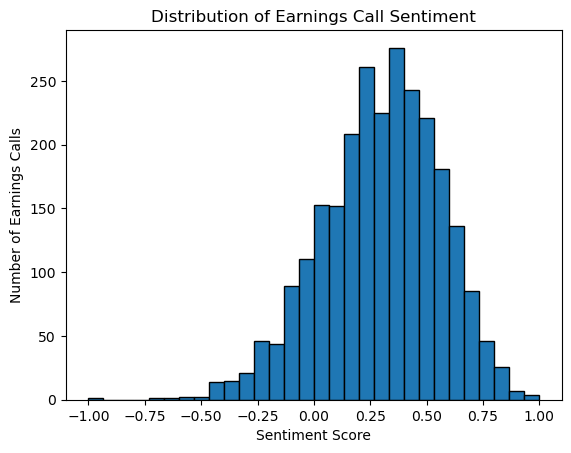

In [64]:
#histogram of sentiment
plt.hist(earnings['sentiment'], bins=30, edgecolor='k')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Earnings Calls')
plt.title('Distribution of Earnings Call Sentiment')
plt.show()

In [85]:
#defining a function to generate a long, short or no trade
def generate_signal(sentiment):
    if sentiment >= upper:
        return 1  # LONG
    elif sentiment <= lower:
        return -1  # SHORT
    else:
        return 0   # NO TRADE

#based on my phd analyis it 
upper = 0.75 #setting sentiment threshold for buys
lower = -0.25 #setting sentiment threshold for sells

earnings['signal'] = earnings['sentiment'].apply(generate_signal)

### Calculating returns

In [86]:
#calculating returns
earnings['raw_return'] = (earnings['exit_price'] / earnings['entry_price']) - 1
earnings['strategy_return'] = earnings['raw_return'] * earnings['signal']

#subtract transaction cost
transaction_cost = 0.001  # 0.1%
earnings['strategy_return_net'] = earnings['strategy_return'] - transaction_cost * earnings['signal'].abs()

In [88]:
#Compute cumlative returns
earnings['cumulative_return'] = (1 + earnings['strategy_return_net']).cumprod()

In [89]:
#Performance Stats
sharpe = earnings['strategy_return_net'].mean() / earnings['strategy_return_net'].std() * (252**0.5)
hit_rate = (earnings['strategy_return_net'] > 0).mean()
total_return = earnings['strategy_return_net'].sum()

print(f"Total return: {total_return:.2%}")
print(f"Hit rate: {hit_rate:.2%}")
print(f"Annualized Sharpe: {sharpe:.2f}")

Total return: 12.63%
Hit rate: 2.53%
Annualized Sharpe: 0.13


In [91]:
#Plotting earnings - setting up metrics
# Compute simple returns per trade
earnings['return'] = (earnings['exit_price'] - earnings['entry_price']) / earnings['entry_price']

# Sort by entry date
earnings = earnings.sort_values('entry_date').reset_index(drop=True)

# Compute cumulative return
earnings['cumulative_return'] = (1 + earnings['return']).cumprod() - 1

# Optional: compute rolling Sharpe ratio (for fun)
rolling_window = 10
earnings['rolling_sharpe'] = earnings['return'].rolling(rolling_window).mean() / earnings['return'].rolling(rolling_window).std() * np.sqrt(252)

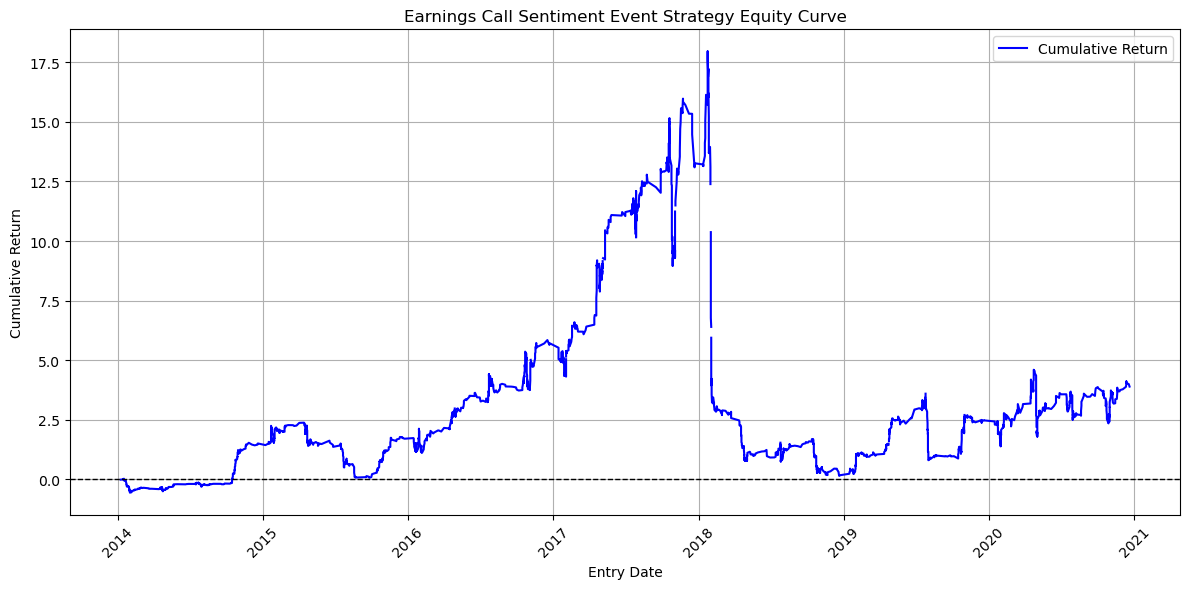

In [95]:
#Plotting cumulative profitability curve
plt.figure(figsize=(12,6))
plt.plot(earnings['entry_date'], earnings['cumulative_return'], color='blue', label='Cumulative Return')
plt.xlabel("Entry Date")
plt.ylabel("Cumulative Return")
plt.title("Earnings Call Sentiment Event Strategy Equity Curve")
plt.grid(True)
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # break-even line
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()